<a href="https://colab.research.google.com/github/rkp74/Bayes-Classifier-KNN-and-K-means/blob/main/RAJAN_KUMAR_CS_IT308_LAB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> IIIT Vadodara </center>
## <center> Winter 2022-23 </center>
## <center> CS/IT 308 Machine Learning Lab</center>
## <center> Lab#2 Bayes' classifier, k-means and k-NN</center>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

## 1. Bayesian decision rule under normality assumption
Hint: use classnote for same

### Consider the following data:
Here, second column represent the class

In [ ]:
dataset = np.array([[3.39,0],[3.58,0],[2.28,0],[7.42,1],[5.74,1],[9.17,1],[7.79,1],[7.93,1],[1.34,0],[3.11,0]])
print('Feature|Classe')
print(dataset)

Feature|Classe
[[3.39 0.  ]
 [3.58 0.  ]
 [2.28 0.  ]
 [7.42 1.  ]
 [5.74 1.  ]
 [9.17 1.  ]
 [7.79 1.  ]
 [7.93 1.  ]
 [1.34 0.  ]
 [3.11 0.  ]]


### Find class probability $P_1$ and $P_2$

In [ ]:

data = pd.DataFrame(dataset, columns = ['Feature','Class'])
print(data)


   Feature  Class
0     3.39    0.0
1     3.58    0.0
2     2.28    0.0
3     7.42    1.0
4     5.74    1.0
5     9.17    1.0
6     7.79    1.0
7     7.93    1.0
8     1.34    0.0
9     3.11    0.0


In [ ]:
X=dataset[:,0]
Y=dataset[:,1]
c1=X[Y==1]
c0=X[Y==0]
P1=np.sum(c1)/np.sum(X)
P0=np.sum(c0)/np.sum(X)
print("Probability of Class1 is",str(P1))
print("Probability of Class0 is",str(P0))

Probability of Class1 is 0.7352657004830917
Probability of Class0 is 0.2647342995169082


### Find sample mean and sample standard deviation for each class 

In [ ]:
#write code here
import numpy as np

# Select samples in class 0
class1 = dataset[dataset[:, 1] == 0]

# Calculate mean and standard deviation of class 0
mean1 = np.mean(class1[:, 0])
std1 = np.std(class1[:, 0])

# Select samples in class 1
class2 = dataset[dataset[:, 1] == 1]

# Calculate mean and standard deviation of class 1
mean2 = np.mean(class2[:, 0])
std2 = np.std(class2[:, 0])

print("Sample Mean of Class 0: ", mean1)
print("Sample Standard Deviation of Class 0: ", std1)
print("Sample Mean of Class 1: ", mean2)
print("Sample Standard Deviation of Class 1: ", std2)


Sample Mean of Class 0:  2.7399999999999998
Sample Standard Deviation of Class 0:  0.8290476463991681
Sample Mean of Class 1:  7.609999999999999
Sample Standard Deviation of Class 1:  1.1046628444914763


### Plot $p_1(x)$ and $p_2(x)$

In [ ]:
# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
    const=1/(2*math.pi*(stdev*2))*1/2
    exp=np.exp(-np.square(np.subtract(x,mean))/2*(stdev**2))
    p=np.multiply(const,exp)
    return p

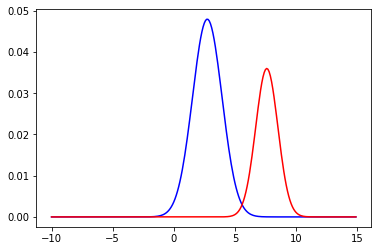

In [ ]:
x  = np.arange(-10,15,0.1)
plt.plot(x,calculate_probability(x,mean1,std1),'b',x,calculate_probability(x,mean2,std2),'r')

### Test for $x=3$  and $x=5$

In [ ]:
#for x=3
def get_class(x,mean,std):
  current_class=-1
  pold=-1
  for class_,(i,j) in enumerate(zip(mean,std)):
    exponent = np.exp(-((x-i)*2 / (2 * j*2 )))
    p= (1 / (np.sqrt(2 * np.pi) * j)) * exponent
    if p>pold:
      pold=p
      current_class=class_
  return current_class

print(f"class: {get_class(3,[mean1,mean2],[std1,std2])}")


class: 1


In [ ]:
#for x=5
print(f"class: {get_class(5,[mean1,mean2],[std1,std2])}")


class: 1


## Homework:
1. Try for this 2-D data using classnote.
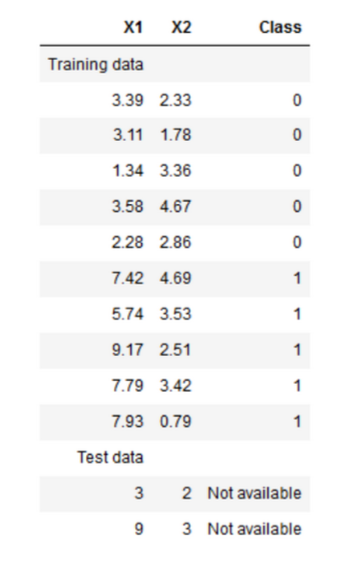 
2. Implement Bayesian classifier for iris data.
You can get help from following link. https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/

In [ ]:
#write code here

## 2. K-Nearest neighbour (KNN)

Consider the following observations:
<br>
>Sr.No. | Feature 1 | Feature 2 | Class
>--- | --- | --- | ---
Training data
>1 | -2 | -1 | C1
>2 | -2 |  1 | C2
>3 | -2 |  2 | C2
>4 | -1 | -1 | C1
>5 |  1 | -1 | C1
>6 |  1 |  1 | C3
>7 |  1 |  2 | C3
>8 |  2 |  1 | C3
Test data
>1 | -1 |  1 | Not available

Use KNN technique to classify the test data using K=3.

Hint: 
<br>
1) Calculate the Euclidean distance between the new point and the existing points.
<br>
2) Sort out the points distance-wise.
<br>
3) Now select the k-neighbours. 

In [ ]:
data = np.float32([[-2,-1,1],[-2,1,2],[-2,2,2],[-1,-1,1],[1,-1,1],[1,1,3],[1,2,3],[2,1,3]])
print('Feature1|Feature2|Class')
print(data)

Feature1|Feature2|Class
[[-2. -1.  1.]
 [-2.  1.  2.]
 [-2.  2.  2.]
 [-1. -1.  1.]
 [ 1. -1.  1.]
 [ 1.  1.  3.]
 [ 1.  2.  3.]
 [ 2.  1.  3.]]


In [ ]:
#write code here
import numpy as np

# Group given data in given classes
def group(data):
  grouped={}
  for point in data:
    if point[2] not in grouped:
      grouped[point[2]]=[]
      grouped[point[2]].append([point[0],point[1]])
    else:
      grouped[point[2]].append([point[0],point[1]])
  
  return grouped

data = np.float32([[-2,-1,1],[-2,1,2],[-2,2,2],[-1,-1,1],[1,-1,1],[1,1,3],[1,2,3],[2,1,3]])
classes=group(data)
print(classes)
  
  # Find centroids of the grouped classes
def findCentroid(data): # data is dict of classes 
  centroids={}
  for i in data: #accessing key
    cent_x=0
    cent_y=0
    for pair in data[i]:
      cent_x+=pair[0]
      cent_y+=pair[1]
    k=len(data[i])
    # print(k)
    cent_x=round(cent_x/k,3)
    cent_y=round(cent_y/k,3)
    centroids[i]=[cent_x,cent_y]
  
  return centroids

def knn(centroids,pair):
  dist={}
  for i in centroids:
    dist[i]=np.sqrt((centroids[i][0]-pair[0])**2+(centroids[i][1]-pair[1])**2)
  
  sorted_dist = dict(sorted(dist.items(), key=lambda item: item[1]))
  # Now we have the distance from centroids sorted in increasing order
  print(sorted_dist)
  # Return the key of the smallest distance which represents class in our case.
  return list(sorted_dist.keys())[0]

cen=findCentroid(classes)
print("The point (-1,1) belongs to class : ",knn(cen,[-1,1]))

    

{1.0: [[-2.0, -1.0], [-1.0, -1.0], [1.0, -1.0]], 2.0: [[-2.0, 1.0], [-2.0, 2.0]], 3.0: [[1.0, 1.0], [1.0, 2.0], [2.0, 1.0]]}
{2.0: 1.118033988749895, 1.0: 2.027532737096987, 3.0: 2.356645497311804}
The point (-1,1) belongs to class :  2.0


## 3. K-Means

Ignore the class information of the training data given in problem 2 and use K-means algorithm to classify the same. Assume the initial starting classes as:  
<br>
C1={observations 1,2}
<br>
C2={observations 3,4,5}
<br>
C3={observations 6,7,8}
<br>

Now using the result find the class that would be assigned to the test data.

<br>
Hint: 

1) Find the centroid (mean) of each cluster based on the initial classes assignment given.

2) Find out the Euclidean distance between each point and each cluster centroid. 

3) Assign all the points to the closest cluster centroid.

4) Recompute centroids of newly formed clusters.

5) Stop if the new centroids are same as old centroids else repeat step 2 to 4. 

In [ ]:
import pprint
X = data[:,:-1].tolist()

# Initial classes defined as
kdict={
    1:X[0:2],
    2:X[2:5],
    3:X[5:]
} 

pprint.pprint(kdict)

# centroids of intial class
centroid = findCentroid(kdict)
print('initial centroids = \n')
pprint.pprint(centroid)

{1: [[-2.0, -1.0], [-2.0, 1.0]],
 2: [[-2.0, 2.0], [-1.0, -1.0], [1.0, -1.0]],
 3: [[1.0, 1.0], [1.0, 2.0], [2.0, 1.0]]}
initial centroids = 

{1: [-2.0, 0.0], 2: [-0.667, 0.0], 3: [1.333, 1.333]}


In [ ]:


#write code for kmeans

####################################################

  # calculate distance bw two points
def distance(x,y):
  return np.sqrt((x[0]-y[0])**2+(x[1]-y[1])**2)

####################################################

#  from given clusters centroids find the cluster with lowest distance with point 
def lowest_distance_cluster_from_point(centroids,point):
  dist={}
  for key,value in centroids.items():
    dist[key]=distance(value,point)
  
  sorted_dist = dict(sorted(dist.items(), key=lambda item: item[1]))
  # Now we have the distance from centroids sorted in increasing order 
  # Return cluster with smallest distance bw point and clusters.
  return list(sorted_dist.keys())[0]


####################################################

def kmeans(X,number_of_clusters, iterations,intial_centroids):
  # choosing some intial centroids
  if intial_centroids=={}:
    points=random.sample(X,number_of_clusters)
    centroids={}
    for i in range(points):
      centroids[i]=points[i]
  else:
    centroids=intial_centroids
  
  result={} # final clustering result

  for i in range(iterations): #stopping criteria
    cluster={}
    for point in X:
      t=lowest_distance_cluster_from_point(centroids,point)
      if t not in cluster:
        cluster[t]=[]
        
      cluster[t].append(point)
    
    centroids=findCentroid(cluster)
    if i==iterations-1:
      result = cluster
  
  return result
    



cluster=kmeans(X,3,100,centroid)
pprint.pprint(cluster)

    



# centroid = #write code here
# print('intial centroids = \n',centroid)

{1: [[-2.0, -1.0], [-2.0, 1.0], [-2.0, 2.0]],
 2: [[-1.0, -1.0], [1.0, -1.0]],
 3: [[1.0, 1.0], [1.0, 2.0], [2.0, 1.0]]}
